# Lecture 14 - Searching

## Overview, Objectives, and Key Terms
 
In this lecture and [Lecture 14](ME400_Lecture_14.ipynb), we tackle two of the most important practical problems in computing: *searching* and *sorting*.  We'll start with *searching* in this lecture because it is the simpler problem, but efficient searching depends on sorted values.  Along the way, algorithms will be classified by their *order*, a way to describe how good (or bad) an algorithm is for problems of different sizes.

### Objectives

By the end of this lesson, you should be able to

- Sort an array of numbers using a linear search.
- Sort an array of numbers using a binary search.
- Describe what is mean by order and use it to compare algorithms.

### Key Terms

- linear search
- binary search
- `time.time()`
- `%timeit

## The Basic, Linear Search

A search algorithm solves the following problem: given a sequence of values, find the location of the element in the sequence equal to some value of interest.  If all we want is equality, then the order of the elements does not matter, and a simple solution is a **linear search** of the unsorted sequence.  Linear search algorithms represent the brute-force approach: search every element in the sequence, from one end to the other, until the match is found.  The algorithm can be summarized in pseudocode as follows:

```
"""Linear search for unsorted sequence"""
Input: a, n, v # sequence, number elements, value of interest
Set location = Not found
Set i = 0
while i < n
    If a[i] == v then
        Set location = i
        Break  # stealing an idea from the Python we've learned
Output: location
```

Searching requires that an expression line `a[i] == v` has meaning.  For `int`, `float`, and `str` values, it does.  For more complicated types, it might not be so obvious.  Are the lists `[1, 2, 3]` and `[2, 2, 2]` equal?  In total, no, but some elements are, and maybe that's what matters.


> **Exercise**: Implement this algorithm in Python and test with sequence `[2, 6, 1, 7, 3]` and value `7`.

One does not need to sort values before searching them with a linear search if *equality* is to be checked.  However, what if one wants to find (1) the location of an element in a sequence equal to some value or, if not found, (2) the location of the value that is closest to but less than the value of interest.  For this latter case, values need to be sorted.  Those algorithms will be studied next time, but an easy way to sort a sequence is with the `sorted()` function:

In [1]:
a = [2, 6, 1, 7, 3]
sorted(a)

[1, 2, 3, 6, 7]

Hence, we can modify somewhat the pseudocode to search sorted values and to find the element equal to (or nearest but smaller than) a value of interest.

```
"""Linear search for sorted sequence"""
Input: a, n, v # sorted sequence, number elements, value of interest
Set location = Not found
Set i = 0
while i < n
    If a[i] > v then
        Break
    Set location = i
    Set i = i + 1
Output: location
```

Lets implement this algorithm as a function:

In [12]:
def linear_search(a, v):
    """Search a sorted sequence for value v. Return nearest 
       index to left if not found.
    """
    location = None
    i = 0
    while i < len(a):
        if a[i] > v:
            break
        location = i
        i += 1
    return location

Now, let's test it on a sorted array and search for a few values:

In [19]:
a = [1, 5, 8, 11, 18]
linear_search(a, 8) # expect 2

2

In [20]:
linear_search(a, 1) # expect 0

0

In [21]:
linear_search(a, 18) # expect 4

4

In [22]:
linear_search(a, 8) # expect 4 again

2

So far, so good.  

> **Exercise**: Modify the `linear_search` algorithm to accept a third argument `compare`, which should be a function that accepts two arguments.  For a sequence `a` and value `v`, `compare(a[i], v)` should return `True` if `a[i]` is greater than `v` and `False` otherwise.  Test your modified search function with `compare = lambda x, y: x[1] > y[1]`,  `a = [(1, 2), (4, 3), (1, 9), (4, 11)]` and `v = (1, 9)`.

## A Bit About Order

Why call linear search *linear*?  One reason might be that the process is pretty linear.  One element is checked after another.  Another reason is that the number of times elements have to be compared (i.e., the number of times `a[i] > v` is evaluated) is proportional (and, in the worst, case *equal*) to the number of elements.  Any time we have a proportional relationship, that relationship is *linear*.  Good old $y = ax + b$ is linear, because $y$ varies linearly with $x$.  For an array of $n$ elements, the number of comparisons is linear with $n$.  The exact number of comparisons depends on the value for which one is searching and the sequence of values.

Generically, this linear relationship is given the fancy name *order $n$*, written compactly as $\mathcal{O}(n)$.  Quite frequently, the computational cost (i.e., how long it takes to run) of an algorithm is directly proportional to its order.  Hence, the time it takes for linear search to find its match should grow, roughly linearly, with the number of elements being searched.

This fact may be intuitive, but it's always nice to see things demonstrated.  Here's what we'll do.  We'll write a little loop that goes from $n = 10$ to $n = 10^6$.  At each size of $n$, we'll draw a random number from 1 to $10^6$ and search for it in the `np.arange(1, n+1)`$, a sorted sequence for sure.  For each step, we'll time things.

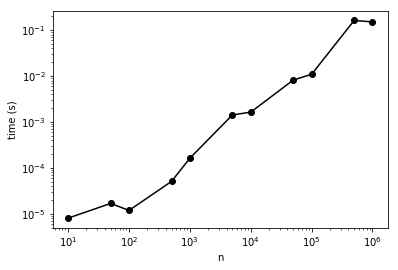

In [41]:
"""Program to show time as a function of size for linear search."""
from time import time
import numpy as np
import matplotlib.pyplot as plt

# Set the seed to keep the output fixed
np.random.seed(12345)

# Set the n values and initialize a list for times
n_values = [1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6]
t_values = []

for n in n_values:
    # Generate the array 1, 2, ..., n
    a = np.arange(1, n+1)
    # Get a random int from [1, n]
    v = np.random.randint(1,n+1)
    # Start the timer
    t_start = time()
    # Do the search
    location = linear_search(a, v)
    # Determine the elapsed time (in seconds) and save it
    t_elapsed = time() - t_start
    t_values.append(t_elapsed)
    
# Plot the times vs values on a log log plot.
plt.figure(1)
plt.loglog(n_values, t_values, 'k-o')  
plt.xlabel('n')
plt.ylabel('time (s)')
plt.show()

Well, this output is not perfectly linear, but then it is based on searching for a random value (which could be at the very beginning or the very end of the sorted array).  A more complete approach would be to do the search *at each n several times* and average the resulting times.

> **Exercise**: Modify the program above so that five different values of `v` are selected for each value of `n`.  Then, average the times and plot the results.